In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# "low_memory = false" will keeps data types more consistent

dataset = pd.read_csv("household_power_consumption.txt", delimiter=';', low_memory=False)

dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [102]:
dataset.shape

(2075259, 9)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [3]:
#Concatenating Date and Time columns into a single DateTime column

dataset['DateTime'] = pd.to_datetime(dataset['Date'].astype(str) + " " + dataset['Time'].astype(str), dayfirst=True)

dataset.insert(0, "DateTime", dataset.pop("DateTime"))

dataset.drop(['Date', 'Time'], axis=1, inplace=True)

dataset.set_index('DateTime', inplace=True)

In [4]:
#Find out the values other than the numeric values in the dataset
for data_type in dataset.columns:
    numeric_values = pd.to_numeric(dataset[data_type], errors='coerce')
    non_numeric = dataset[data_type][numeric_values.isna() & ~dataset[data_type].isna()]
    if not non_numeric.empty:
        print(f"Non-numeric values in column '{data_type}':")
        print(non_numeric.unique())

Non-numeric values in column 'Global_active_power':
['?']
Non-numeric values in column 'Global_reactive_power':
['?']
Non-numeric values in column 'Voltage':
['?']
Non-numeric values in column 'Global_intensity':
['?']
Non-numeric values in column 'Sub_metering_1':
['?']
Non-numeric values in column 'Sub_metering_2':
['?']


In [5]:
#Replacing "?" with Nan

dataset = dataset.replace('?', np.nan)

In [106]:
#Find out the percentage of Nan values in each column
Percentage_of_NaN_Values = dataset.isna().sum() / len(dataset) * 100
for col, perc in zip(dataset.columns, Percentage_of_NaN_Values):
    print(f"{col} : {perc:.2f}% of NaN values")

Global_active_power : 1.25% of NaN values
Global_reactive_power : 1.25% of NaN values
Voltage : 1.25% of NaN values
Global_intensity : 1.25% of NaN values
Sub_metering_1 : 1.25% of NaN values
Sub_metering_2 : 1.25% of NaN values
Sub_metering_3 : 1.25% of NaN values


In [6]:
# changing the data types of columns to numeric (float)
for column in dataset.columns:
    dataset[column] = dataset[column].astype(float)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [7]:
# Converting Zeros into NaN for all columns
dataset = dataset.replace(0, np.nan)

In [109]:
#Find out the percentage of Nan values in each column
Percentage_of_NaN_Values = dataset.isna().sum() / len(dataset) * 100
for col, perc in zip(dataset.columns, Percentage_of_NaN_Values):
    print(f"{col} : {perc:.2f}% of NaN values")

Global_active_power : 1.25% of NaN values
Global_reactive_power : 24.46% of NaN values
Voltage : 1.25% of NaN values
Global_intensity : 1.25% of NaN values
Sub_metering_1 : 91.85% of NaN values
Sub_metering_2 : 70.49% of NaN values
Sub_metering_3 : 42.31% of NaN values


In [13]:
dataset.shape

(2075259, 7)

In [8]:
#droping the rows that cotains all the values as NaN
dataset.dropna(how='all', inplace=True)

In [15]:
dataset.shape

(2049280, 7)

In [16]:
dataset.isna().sum()

Global_active_power            0
Global_reactive_power     481561
Voltage                        0
Global_intensity               0
Sub_metering_1           1880175
Sub_metering_2           1436830
Sub_metering_3            852092
dtype: int64

In [17]:
#Find out the percentage of Nan values in each column
Percentage_of_NaN_Values = dataset.isna().sum() / len(dataset) * 100
for col, perc in zip(dataset.columns, Percentage_of_NaN_Values):
    print(f"{col} : {perc:.2f}% of NaN values")

Global_active_power : 0.00% of NaN values
Global_reactive_power : 23.50% of NaN values
Voltage : 0.00% of NaN values
Global_intensity : 0.00% of NaN values
Sub_metering_1 : 91.75% of NaN values
Sub_metering_2 : 70.11% of NaN values
Sub_metering_3 : 41.58% of NaN values


In [9]:
#Displaying the data points into 2 decimal points
pd.options.display.float_format = '{:.2f}'.format
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2049280.00,1567719.00,2049280.00,2049280.00,169105.00,612450.00,1197188.00
mean,1.09,0.16,240.84,4.63,13.60,4.34,11.06
std,1.06,0.10,3.24,4.44,17.01,10.01,8.43
min,0.08,0.05,223.20,0.20,1.00,1.00,1.00
25%,0.31,0.09,238.99,1.40,1.00,1.00,1.00
50%,0.60,0.13,241.01,2.60,1.00,1.00,17.00
75%,1.53,0.22,242.89,6.40,36.00,2.00,18.00
max,11.12,1.39,254.15,48.40,88.00,80.00,31.00


In [19]:
dataset.isna().sum()

Global_active_power            0
Global_reactive_power     481561
Voltage                        0
Global_intensity               0
Sub_metering_1           1880175
Sub_metering_2           1436830
Sub_metering_3            852092
dtype: int64

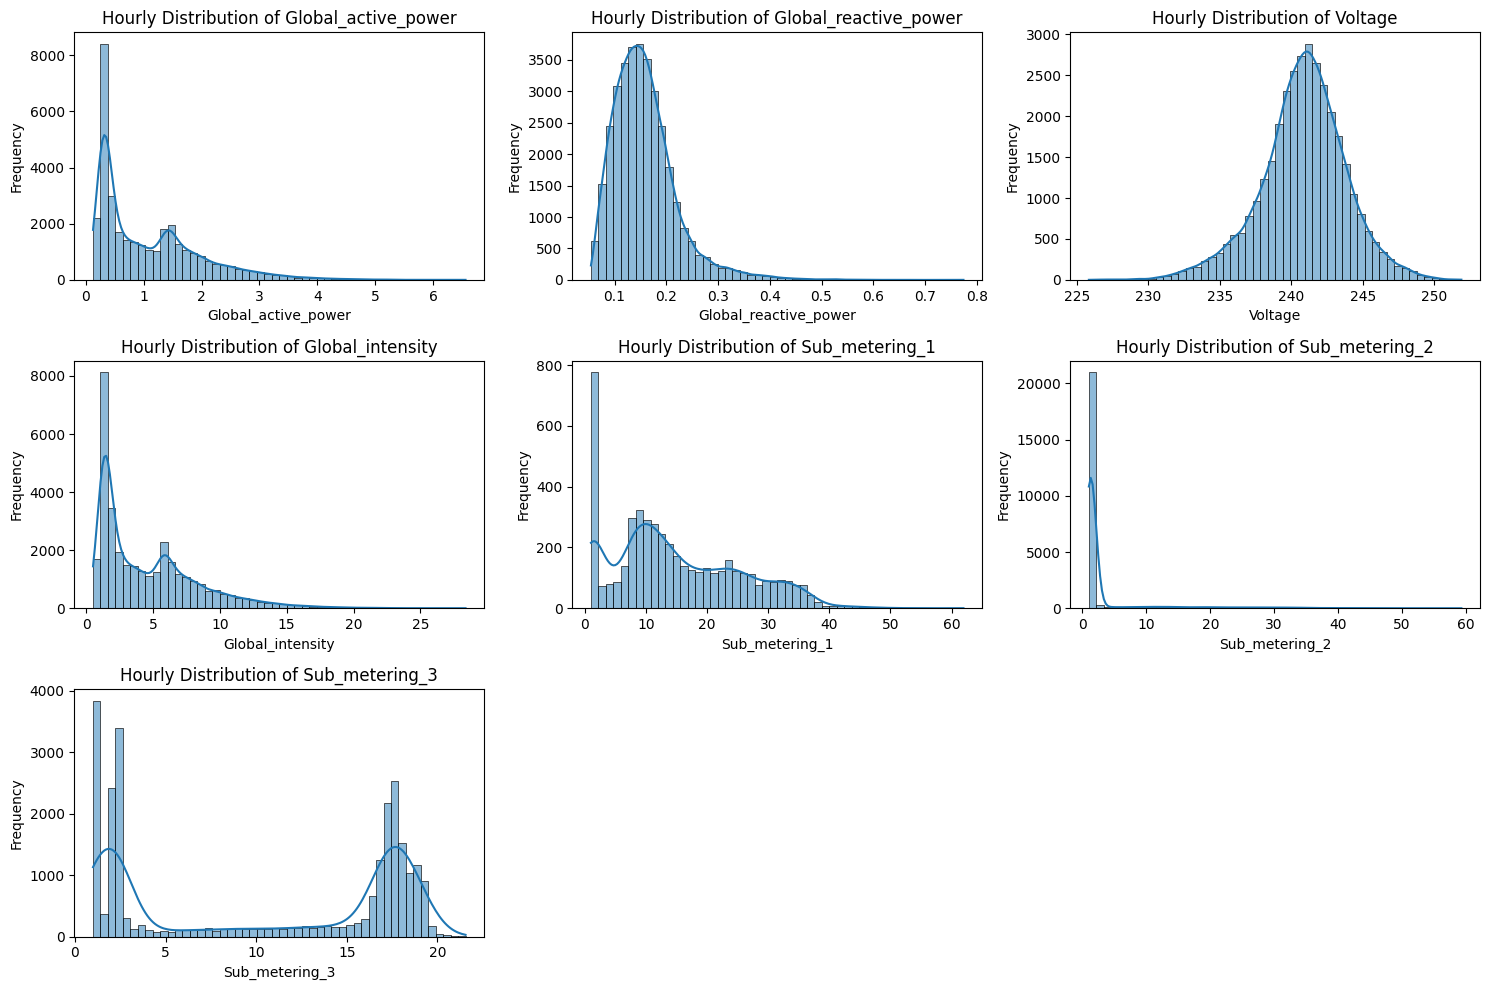

In [112]:
# Hourly based distribution plot
df_hourly = dataset.resample('h').mean()

row = 3
column = 3

plt.figure(figsize=(15,10))

for i, col in enumerate(df_hourly.columns, 1):
    plt.subplot(row, column, i)
    sns.histplot(df_hourly[col].dropna(), bins=50, kde=True)
    plt.title(f'Hourly Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

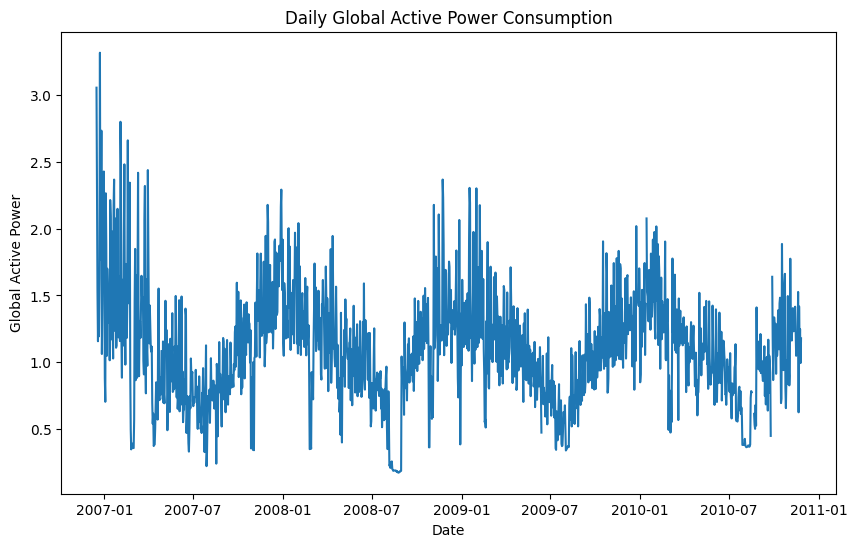

In [113]:
# Daily Trend of global active power consumption

dataset_daily = dataset.resample('D').mean()

plt.figure(figsize=(10,6))
plt.plot(dataset_daily.index, dataset_daily['Global_active_power'])
plt.title('Daily Global Active Power Consumption')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.show()

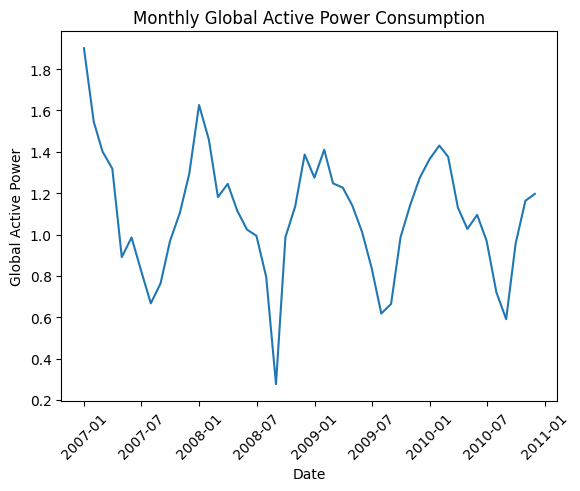

In [114]:
# Monthly Trend of global active power consumption
dataset_monthly = dataset.resample('ME').mean()

plt.Figure(figsize=(8,6))
plt.plot(dataset_monthly.index, dataset_monthly['Global_active_power'])
plt.title('Monthly Global Active Power Consumption')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.xticks(rotation=45)
plt.show()

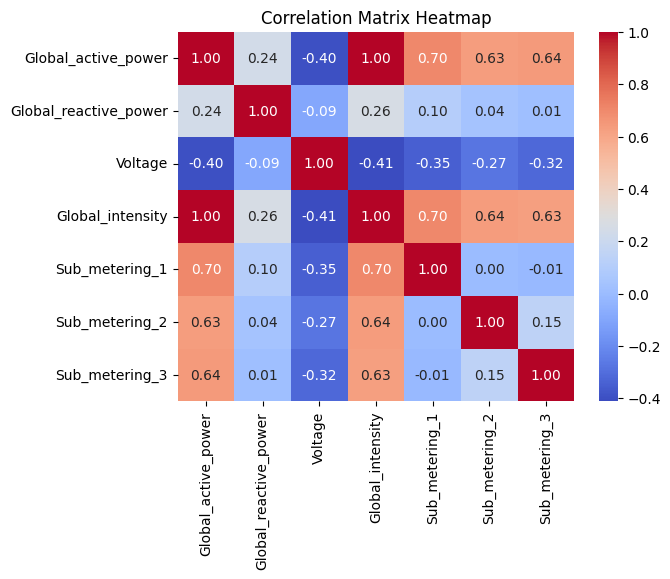

In [15]:
# correlation matrix heatmap

plt.Figure(figsize=(8,6))
sns.heatmap(dataset.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [25]:
dataset.shape

(2049280, 7)

In [26]:
dataset.isna().sum()

Global_active_power            0
Global_reactive_power     481561
Voltage                        0
Global_intensity               0
Sub_metering_1           1880175
Sub_metering_2           1436830
Sub_metering_3            852092
dtype: int64

In [28]:
df_hourly.shape

(34589, 7)

In [10]:
# Identifying outliers using the IQR method

outlier_counts = {}
df_OL = dataset.copy()

for col in df_OL.columns:
    Q1 = df_OL[col].quantile(0.25)
    Q3 = df_OL[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_OL[(df_OL[col] < lower_bound) | (df_OL[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

outlier_counts

{'Global_active_power': 94907,
 'Global_reactive_power': 38693,
 'Voltage': 51067,
 'Global_intensity': 100961,
 'Sub_metering_1': 0,
 'Sub_metering_2': 69962,
 'Sub_metering_3': 0}

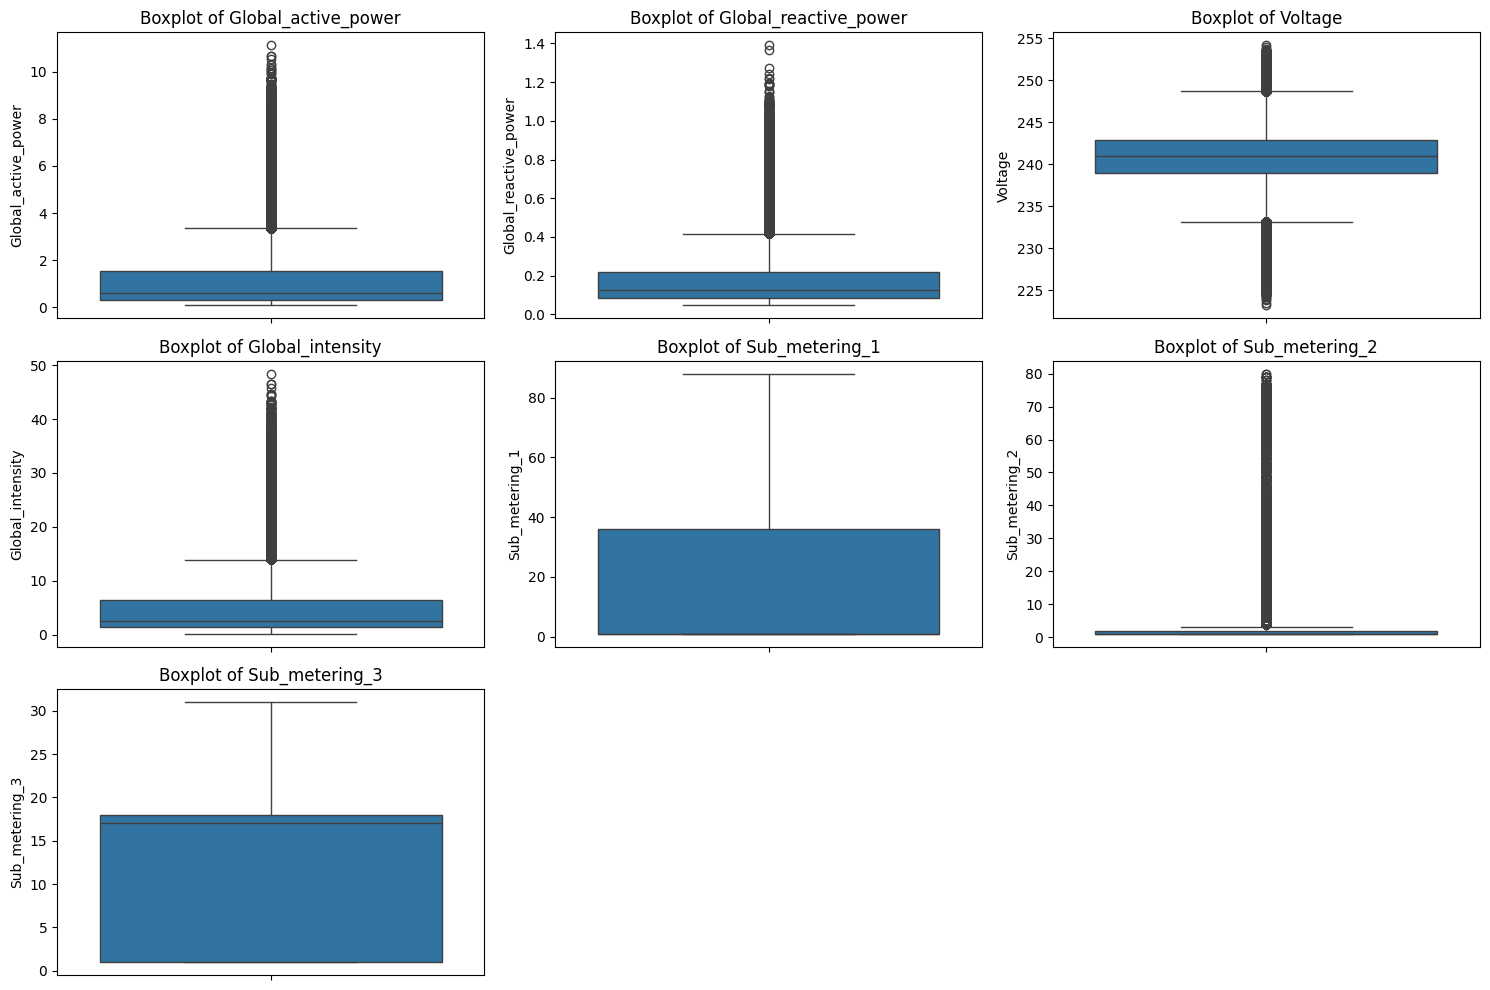

In [18]:
# Boxplot for outlier detection

rows = 3
columns = 3

plt.figure(figsize=(15,10))
for i, col in enumerate(dataset.columns, 1):
    plt.subplot(rows, columns, i)
    sns.boxplot(y=dataset[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

In [11]:
#Capping the outliers values using IQR
df_cap = dataset.copy()
for col in df_cap.columns:
    Q1 = df_cap[col].quantile(0.25)
    Q3 = df_cap[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cap[col] = np.where(df_cap[col] < lower_bound, lower_bound,
                              np.where(df_cap[col] > upper_bound, upper_bound, df_cap[col]))
df_cap.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,3.36,0.42,234.84,13.90,NaN,1.00,17.00
2006-12-16 17:25:00,3.36,0.42,233.63,13.90,NaN,1.00,16.00
2006-12-16 17:26:00,3.36,0.42,233.29,13.90,NaN,2.00,17.00
2006-12-16 17:27:00,3.36,0.42,233.74,13.90,NaN,1.00,17.00
2006-12-16 17:28:00,3.36,0.42,235.68,13.90,NaN,1.00,17.00


In [13]:
# Identifying outliers using the IQR method after capping

outlier_counts = {}
df_OL_AC = df_cap.copy()

for col in df_OL_AC.columns:
    Q1 = df_OL_AC[col].quantile(0.25)
    Q3 = df_OL_AC[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_OL[(df_OL_AC[col] < lower_bound) | (df_OL_AC[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

outlier_counts

{'Global_active_power': 0,
 'Global_reactive_power': 0,
 'Voltage': 0,
 'Global_intensity': 0,
 'Sub_metering_1': 0,
 'Sub_metering_2': 0,
 'Sub_metering_3': 0}

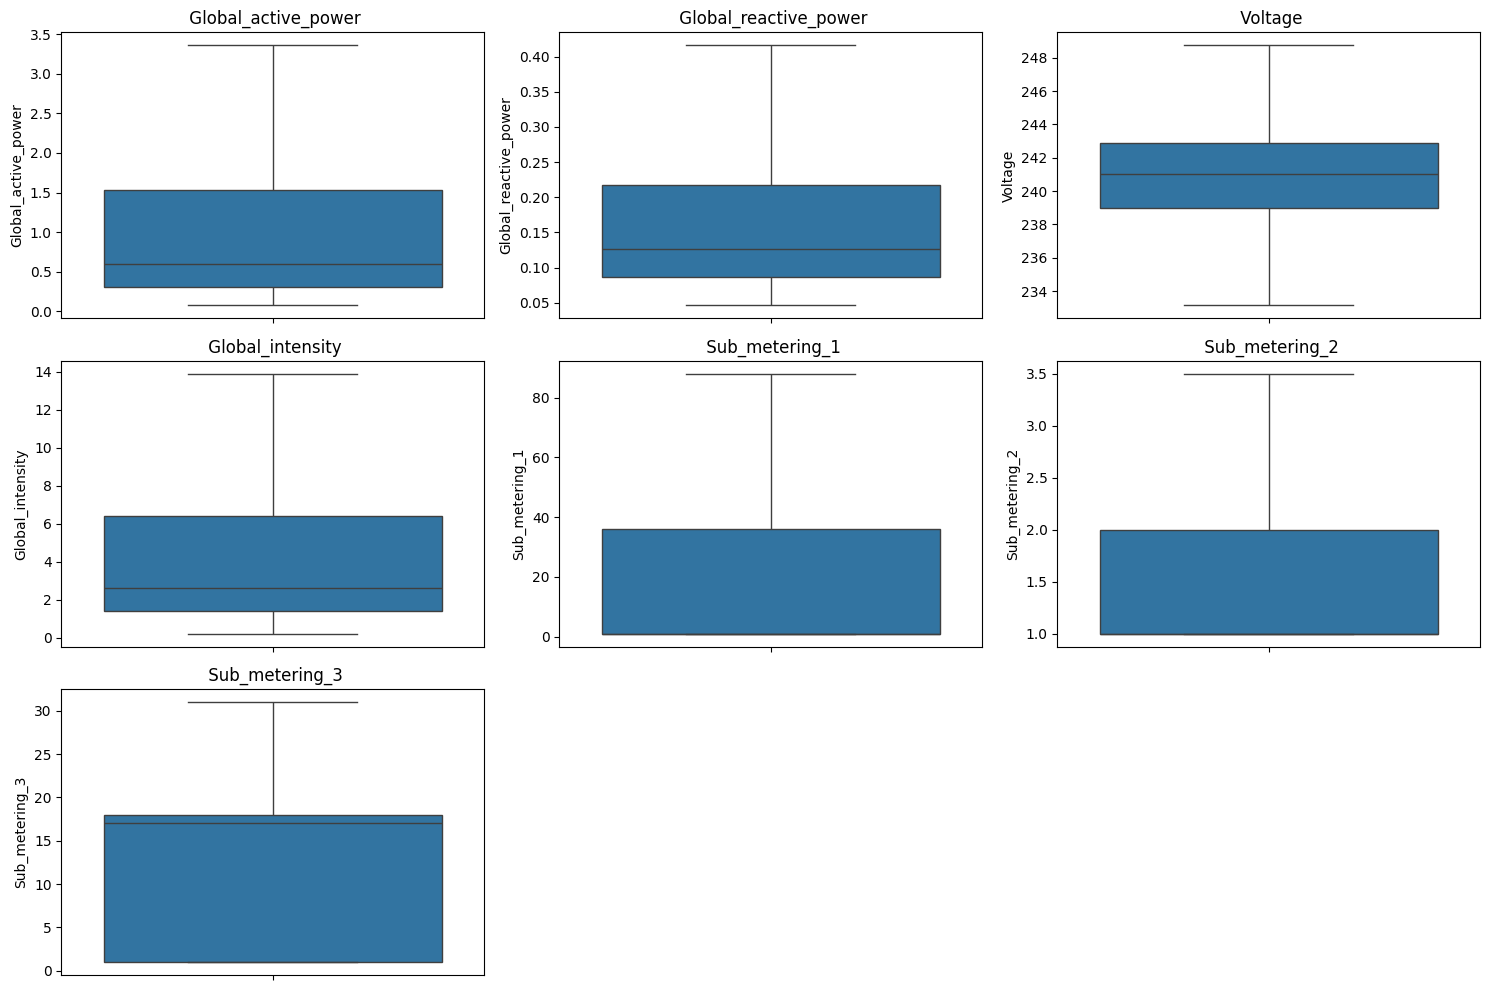

In [49]:
# Boxplot for outlier detection after resampling

rows = 3
columns = 3

plt.figure(figsize=(15,10))
for i, col in enumerate(df_OL_AC.columns, 1):
    plt.subplot(rows, columns, i)
    sns.boxplot(y=df_OL_AC[col])
    plt.title(f' {col}')
    plt.tight_layout()

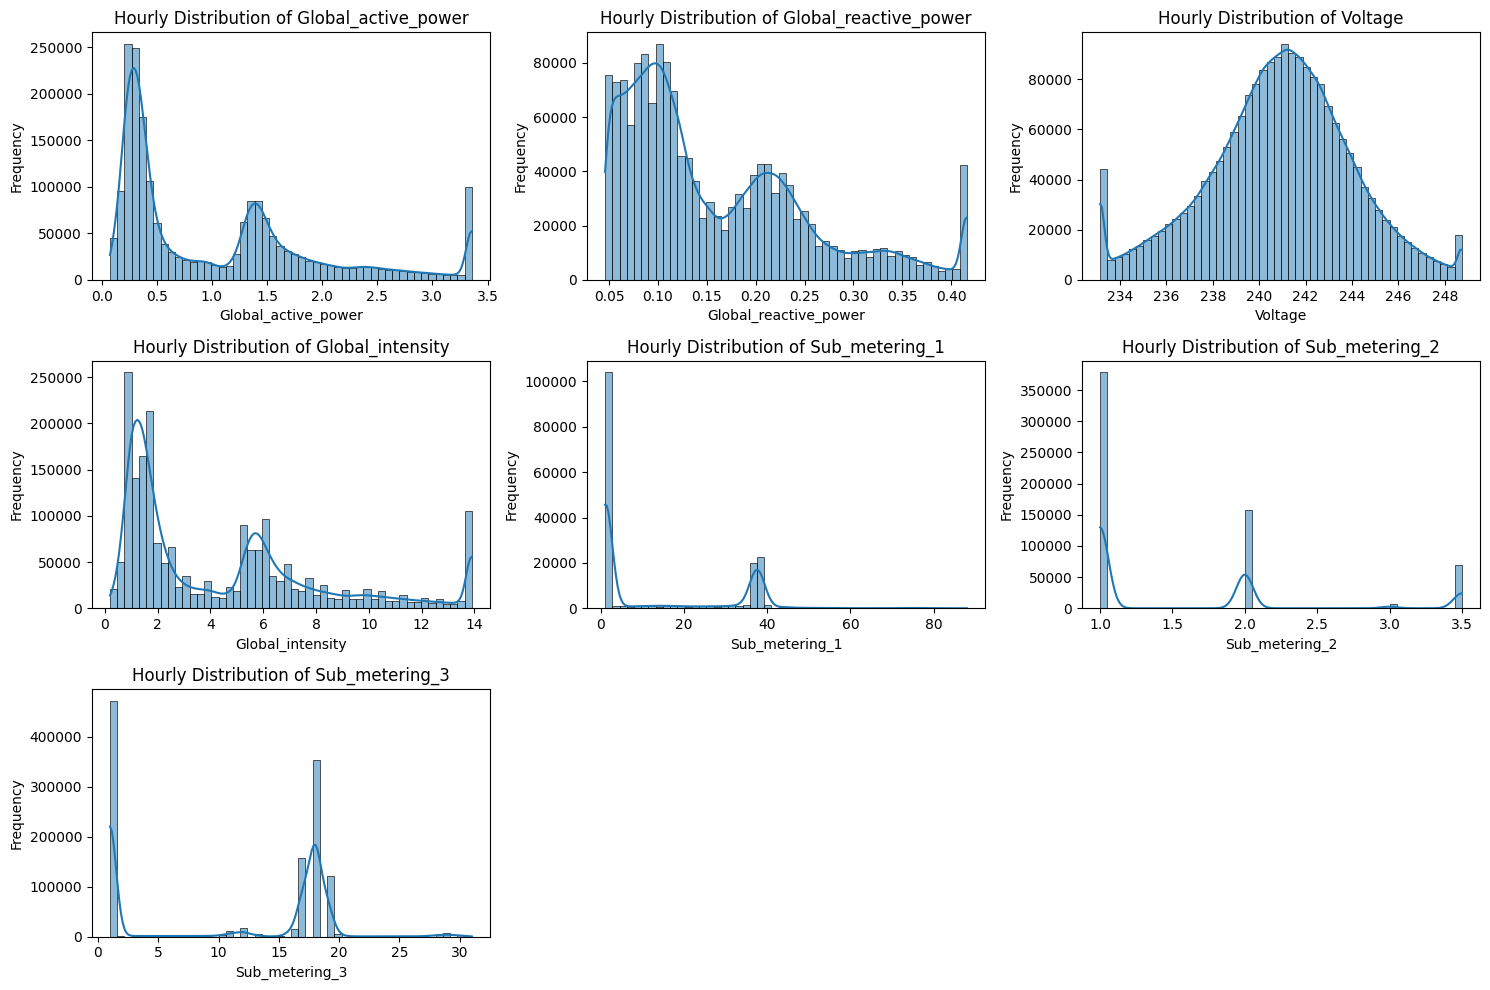

In [118]:
# Hourly based distribution plot after outlier capping for each feature
row = 3
column = 3

plt.figure(figsize=(15,10))

for i, col in enumerate(df_OL_AC.columns, 1):
    plt.subplot(row, column, i)
    sns.histplot(df_OL_AC[col].dropna(), bins=50, kde=True)
    plt.title(f'Hourly Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
# Feature Engineering
# creating columns hour,day,day of the week, month, is_weekend, Lags, rolling windows

df_FE = df_OL_AC.copy()

df_FE['Hour'] = df_FE.index.hour
df_FE['Day'] = df_FE.index.day
df_FE['Day_of_Week'] = df_FE.index.dayofweek
df_FE['Month'] = df_FE.index.month
df_FE['Is_Weekend'] = df_FE['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)

# Lag Features
lags = [1,2,3,24] # 1 hour, 2 hours, 3 hours, 24 hours (1 day)
for l in lags: 
    df_FE[f'lag_{l}'] = df_FE['Global_active_power'].shift(l)

# Rolling Window Features
for window in [3, 6, 12, 24]:
    df_FE[f'Rolling_Mean_{window}'] = df_FE['Global_active_power'].rolling(window=window).mean().shift(1)   
    df_FE[f'Rolling_STD_{window}'] = df_FE['Global_active_power'].rolling(window=window).std().shift(1)

# dropping Nan values
df_FE.dropna(inplace=True)
df_FE.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day,Day_of_Week,...,lag_3,lag_24,Rolling_Mean_3,Rolling_STD_3,Rolling_Mean_6,Rolling_STD_6,Rolling_Mean_12,Rolling_STD_12,Rolling_Mean_24,Rolling_STD_24
DateTime,,,,,,,,,,,,,,,,,,,,,
2006-12-17 10:23:00,2.24,0.16,237.33,10.00,1.00,3.50,17.00,10,17,6,...,1.30,2.30,1.47,0.21,1.41,0.15,2.00,0.92,2.20,1.03
2006-12-17 10:24:00,3.36,0.30,235.15,13.90,2.00,3.50,17.00,10,17,6,...,1.39,2.29,1.78,0.43,1.56,0.37,1.95,0.89,2.20,1.03
2006-12-17 10:25:00,3.21,0.30,235.99,13.90,1.00,3.50,17.00,10,17,6,...,1.70,0.37,2.43,0.84,1.89,0.80,1.95,0.89,2.24,1.05
2006-12-17 10:26:00,3.36,0.28,235.16,13.90,1.00,3.50,17.00,10,17,6,...,2.24,0.47,2.94,0.61,2.20,0.90,1.94,0.87,2.36,0.99
2006-12-17 10:27:00,3.20,0.29,236.08,13.90,1.00,3.50,17.00,10,17,6,...,3.36,3.05,3.31,0.08,2.54,0.88,1.94,0.87,2.48,0.93


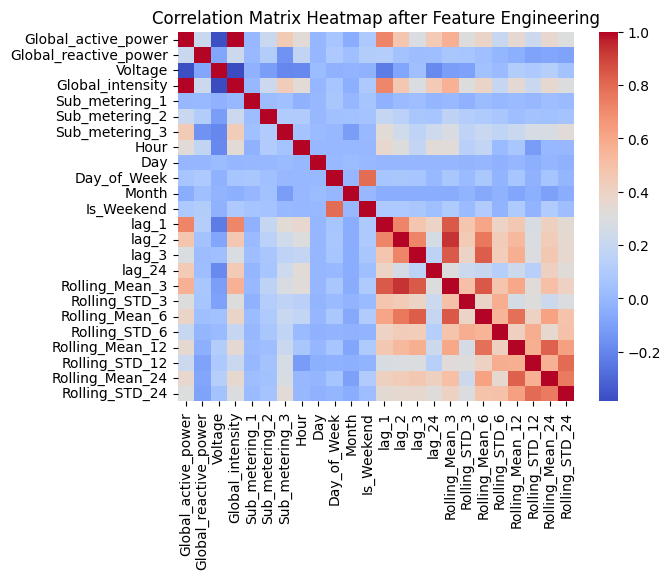

In [25]:
#Finding the correlation using heatmap after feature engineering
plt.Figure(figsize=(20,16))
sns.heatmap(df_FE.corr(), cmap='coolwarm')
plt.title('Correlation Matrix Heatmap after Feature Engineering')
plt.show()


In [56]:
df_FE.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Hour                     0
Day                      0
Day_of_Week              0
Month                    0
Is_Weekend               0
lag_1                    0
lag_2                    0
lag_3                    0
lag_24                   0
Rolling_Mean_3           0
Rolling_STD_3            0
Rolling_Mean_6           0
Rolling_STD_6            0
Rolling_Mean_12          0
Rolling_STD_12           0
Rolling_Mean_24          0
Rolling_STD_24           0
dtype: int64

In [120]:
df_FE.shape

(45673, 24)

In [58]:
df_FE.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Hour', 'Day', 'Day_of_Week', 'Month', 'Is_Weekend',
       'lag_1', 'lag_2', 'lag_3', 'lag_24', 'Rolling_Mean_3', 'Rolling_STD_3',
       'Rolling_Mean_6', 'Rolling_STD_6', 'Rolling_Mean_12', 'Rolling_STD_12',
       'Rolling_Mean_24', 'Rolling_STD_24'],
      dtype='object')

In [121]:
df_FE.to_csv("Cleaned_DS.csv")

In [20]:
#Importing necessary libraries for modeling

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
df_FE = pd.read_csv("Cleaned_DS.csv", index_col='DateTime', parse_dates=True)

In [5]:
df_FE.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Hour', 'Day', 'Day_of_Week', 'Month', 'Is_Weekend',
       'lag_1', 'lag_2', 'lag_3', 'lag_24', 'Rolling_Mean_3', 'Rolling_STD_3',
       'Rolling_Mean_6', 'Rolling_STD_6', 'Rolling_Mean_12', 'Rolling_STD_12',
       'Rolling_Mean_24', 'Rolling_STD_24'],
      dtype='object')

In [16]:
# Feature and target variable separation

X = df_FE.drop('Global_active_power', axis=1)
y = df_FE['Global_active_power']

In [17]:
# Train-test split (time-based). Since it's time series data, we are not shuffling the data.

train_size = int(len(df_FE) * 0.8)
X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]
X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]

In [18]:
X_train.shape , X_test.shape

((36538, 23), (9135, 23))

In [21]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
X_train_scaled

array([[-0.75778041, -0.32323623, -0.22826741, ...,  1.75304729,
        -0.31608848,  1.63889036],
       [ 0.40627617, -1.01995967,  0.86568147, ...,  1.64906174,
        -0.31914486,  1.63839985],
       [ 0.47577208, -0.75149742,  0.86568147, ...,  1.64906174,
        -0.25880962,  1.71958931],
       ...,
       [-0.3581789 ,  2.63624042, -1.0136666 , ..., -0.96651045,
        -1.01543391, -1.33076232],
       [-0.08019524,  1.42496434, -1.12586648, ..., -0.34610708,
        -1.11097414, -0.83602818],
       [-0.13231718,  1.12454231, -1.12586648, ..., -0.38780462,
        -1.10316339, -0.83866389]], shape=(36538, 23))

In [22]:
# Models without hyperparameter tuning
# Linear Regression
lr_model = LinearRegression()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
nn_model = MLPRegressor(max_iter=500)

In [73]:
# ===============================
# 1. Helper function for metrics
# ===============================
def evaluate_model(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n Results for: {model_name}")
    print("---------------------------------------")
    print(f"RMSE : {rmse:.4f}")
    print(f"MAE  : {mae:.4f}")
    print(f"R²   : {r2:.4f}")
    print("---------------------------------------")


# ===============================
# 2. Linear Regression Model
# ===============================
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
evaluate_model("Linear Regression", y_test, y_pred_lr)


# ===============================
# 3. Random Forest Regressor
# ===============================
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)


# ===============================
# 4. Gradient Boosting Regressor
# ===============================
gb_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4
)

gb_model.fit(X_train_scaled, y_train)

y_pred_gb = gb_model.predict(X_test_scaled)
evaluate_model("Gradient Boosting Regressor", y_test, y_pred_gb)


# ===============================
# 5. Neural Network (MLPRegressor)
# ===============================
nn_model = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=300,
    random_state=42
)

nn_model.fit(X_train_scaled, y_train)

y_pred_nn = nn_model.predict(X_test_scaled)
evaluate_model("Neural Network (MLPRegressor)", y_test, y_pred_nn)



 Results for: Linear Regression
---------------------------------------
RMSE : 0.0776
MAE  : 0.0444
R²   : 0.9934
---------------------------------------

 Results for: Random Forest Regressor
---------------------------------------
RMSE : 0.0454
MAE  : 0.0236
R²   : 0.9977
---------------------------------------

 Results for: Gradient Boosting Regressor
---------------------------------------
RMSE : 0.0401
MAE  : 0.0221
R²   : 0.9982
---------------------------------------

 Results for: Neural Network (MLPRegressor)
---------------------------------------
RMSE : 0.0621
MAE  : 0.0460
R²   : 0.9958
---------------------------------------


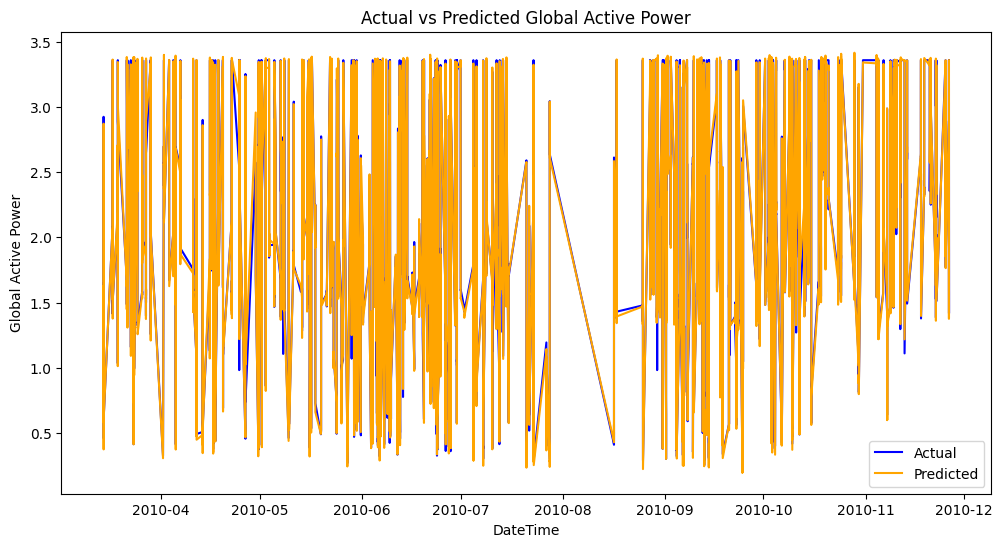

In [ ]:
# Plotting Actual vs Predicted for the best model (random forest regressor)
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_rf, label='Predicted', color='orange')
plt.title('Actual vs Predicted Global Active Power')
plt.xlabel('DateTime')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

In [79]:
# Accuracy of the random forest model

rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
score = r2_score(y_test, y_pred_rf)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.77


Text(0, 0.5, 'Predicted Values')

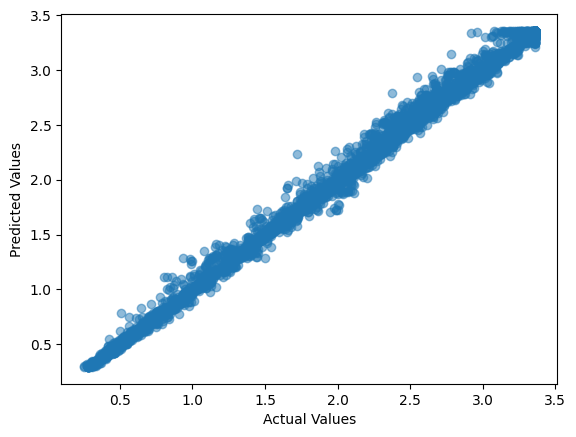

In [80]:
# Scatter plot for Actual vs Predicted values

plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [83]:
# Difference between Actual and Predicted values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_rf,'Difference':y_test-y_pred_rf})
pred_df

,Actual Value,Predicted Value,Difference
DateTime,,,
2010-03-14 13:52:00,1.65,1.65,0.00
2010-03-14 13:53:00,1.59,1.57,0.01
2010-03-14 13:54:00,1.58,1.57,0.01
2010-03-14 13:55:00,1.59,1.57,0.01
2010-03-14 13:56:00,1.57,1.57,0.00
...,...,...,...
2010-11-26 08:30:00,1.42,1.42,0.01
2010-11-26 08:31:00,1.43,1.42,0.01
2010-11-26 08:32:00,1.43,1.42,0.01


### Additional Algorithms

### XGBoost and LSTM
#### Why XGBoost for this data set?
##### XGBoost is one of the strongest algorithms for structured/tabular data. Since this time-series data set can be transformed into a tabular format, XGBoost is a suitable choice.

In [84]:
# XGBoost Implementation
import xgboost as xgb
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
evaluate_model("XGBoost Regressor", y_test, y_pred_xgb)



 Results for: XGBoost Regressor
---------------------------------------
RMSE : 0.0401
MAE  : 0.0220
R²   : 0.9982
---------------------------------------


## LSTM Implementation

### Why LSTM for this data set?

LSTM (Long Short-Term Memory) networks are a type of recurrent neural network (RNN) that are well-suited for time-series data because they can capture long-term dependencies and patterns in sequential data.


In [46]:
# Libraries for LSTM Implementation

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [35]:
# Imputing missing values using forward fill method
df_fill = dataset.copy()
df_hourly = df_fill.resample('h').mean()
df_hourly = df_hourly.interpolate(method='time')
df_hourly = df_hourly.ffill().bfill()
df_hourly.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [36]:
#Oulier Detection and Capping
# Using Z-score method for outlier detection and capping

df_ts = df_hourly.copy()
window = 24 * 7  # 1 week window

for col in df_ts.columns:
    rolling_mean = df_ts[col].rolling(window=window, center=True).mean()
    rolling_std = df_ts[col].rolling(window=window, center=True).std()
    z_scores = (df_ts[col] - rolling_mean) / rolling_std
    df_ts = df_ts[(z_scores.abs() <= 3) | (z_scores.isna())]

In [39]:
# Feature Engineering
# creating columns hour,day,day of the week, month, is_weekend, Lags, rolling windows

df_FE = df_ts.copy()

df_FE['Hour'] = df_FE.index.hour
df_FE['Day'] = df_FE.index.day
df_FE['Day_of_Week'] = df_FE.index.dayofweek
df_FE['Month'] = df_FE.index.month
df_FE['Is_Weekend'] = df_FE['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)

# Lag Features
lags = [1,2,3,24] # 1 hour, 2 hours, 3 hours, 24 hours (1 day)
for l in lags: 
    df_FE[f'lag_{l}'] = df_FE['Global_active_power'].shift(l)

# Rolling Window Features
for window in [3, 6, 12, 24]:
    df_FE[f'Rolling_Mean_{window}'] = df_FE['Global_active_power'].rolling(window=window).mean().shift(1)   
    df_FE[f'Rolling_STD_{window}'] = df_FE['Global_active_power'].rolling(window=window).std().shift(1)

# dropping Nan values
df_FE.dropna(inplace=True)
df_FE.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day,Day_of_Week,...,lag_3,lag_24,Rolling_Mean_3,Rolling_STD_3,Rolling_Mean_6,Rolling_STD_6,Rolling_Mean_12,Rolling_STD_12,Rolling_Mean_24,Rolling_STD_24
DateTime,,,,,,,,,,,,,,,,,,,,,
2006-12-17 17:00:00,3.41,0.17,234.23,14.51,13.44,1.27,16.82,17,17,6,...,2.09,4.22,2.80,0.64,2.41,0.65,2.29,0.72,2.50,0.81
2006-12-17 18:00:00,3.70,0.16,234.37,15.75,12.56,1.28,16.83,18,17,6,...,2.99,3.63,3.24,0.22,2.56,0.77,2.40,0.78,2.47,0.75
2006-12-17 19:00:00,2.91,0.27,233.20,12.52,11.69,1.29,16.68,19,17,6,...,3.33,3.40,3.48,0.20,2.86,0.81,2.60,0.78,2.47,0.76
2006-12-17 20:00:00,3.36,0.27,236.43,14.28,10.82,1.29,17.12,20,17,6,...,3.41,3.27,3.34,0.40,3.07,0.56,2.71,0.72,2.45,0.74
2006-12-17 21:00:00,3.04,0.27,239.10,12.72,9.95,1.20,17.50,21,17,6,...,3.70,3.06,3.32,0.40,3.28,0.29,2.83,0.69,2.45,0.74


In [40]:
df_FE.shape

(32022, 24)

In [43]:
# Sort by Datetime + Select Target
df_ts = df_FE.copy()

df_ts.index = pd.to_datetime(df_ts.index)
df_ts = df_ts.sort_index()

target = df_ts['Global_active_power'].values.reshape(-1, 1)

In [47]:
# Scale the target

scaler = MinMaxScaler()
target_scaled = scaler.fit_transform(target)

In [48]:
# Create Sliding Windows (Sequences)

sequence_length = 24  # using past 24 hours to predict next hour

X, y = [], []
for i in range(sequence_length, len(target_scaled)):
    X.append(target_scaled[i-sequence_length:i, 0])
    y.append(target_scaled[i, 0])

X = np.array(X)
y = np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))  # reshape for LSTM input

In [49]:
# Train-Test Split
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [52]:
# Bulding the model

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),

    LSTM(32),
    Dropout(0.2),

    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

f:\Guvi\Projects\PowerPulse-Household-Energy-Usage-Forecast\HEU_venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
# Training the Model

history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 0.0189 - val_loss: 0.0103
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0126 - val_loss: 0.0077
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0112 - val_loss: 0.0077
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0109 - val_loss: 0.0073
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0105 - val_loss: 0.0072


In [54]:
# Predict & Inverse Transform

y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [55]:
# Evaluation

rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print("LSTM Performance:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

LSTM Performance:
RMSE: 0.4630049533836531
MAE: 0.3489222084968901
R2: 0.4824840949031838


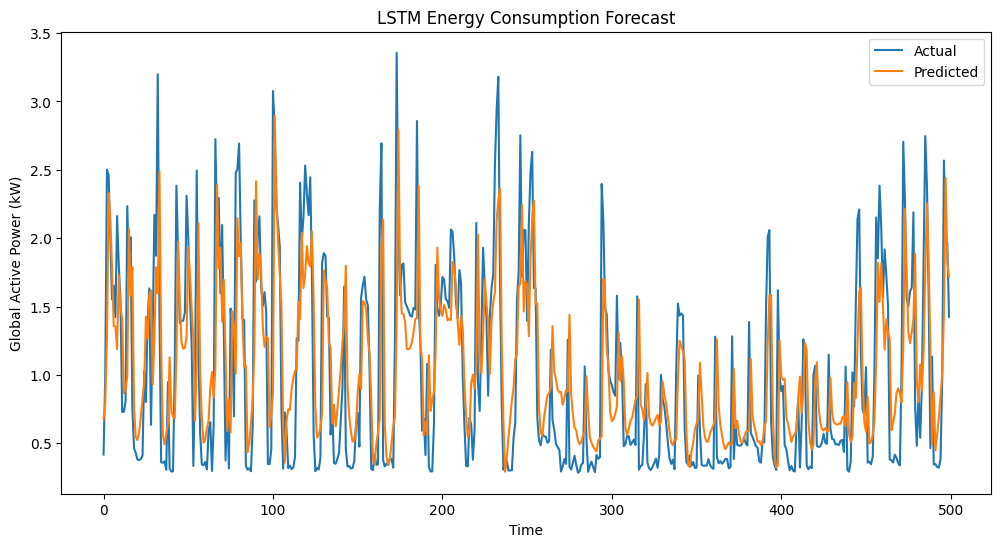

In [56]:
# Plotting the results

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual[:500], label="Actual")
plt.plot(y_pred[:500], label="Predicted")
plt.title("LSTM Energy Consumption Forecast")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.show()